# Аналіз даних деяких показників компанії Yulu.
# **Опис бізнес задачі та набору даних**
Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

Профіль колонок набору даних:
- datetime: дата та час зібрані погодинно
- season: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- holiday: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- workingday: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- weather:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- temp: температура в градусах Цельсія
- atemp: як відчувається температура в градусах Цельсія
- humidity: вологість
- windspeed: швидкість вітру
- casual: кількість неформальних користувачів
- registered: кількість зареєстрованих користувачів
- count: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

Дані доступні за посиланням: https://drive.google.com/file/d/1abUBbpxK6GOoUgA5f40L7EA9ROEiTuf0/view?pli=1



Завантажимо бібліотеки та набір даних

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/yulu_rental.csv')

1. Яким є розподіл кількості зарестрованих та неформальних користувачів за годину.

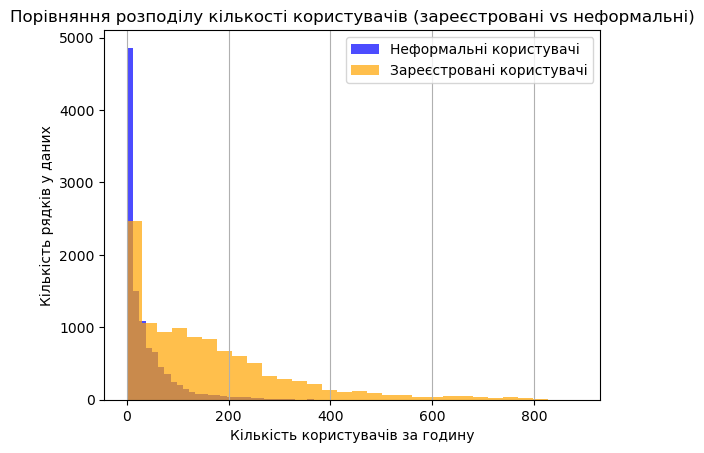

In [18]:
df.casual.hist(bins=30, alpha=0.7, label='Неформальні користувачі', color='blue') # Гістограма для неформальних користувачів
df.registered.hist(bins=30, alpha=0.7, label='Зареєстровані користувачі', color='orange') # Гістограма для зареєстрованих користувачів
plt.title('Порівняння розподілу кількості користувачів (зареєстровані vs неформальні)') # Налаштування графіка
plt.xlabel('Кількість користувачів за годину')
plt.ylabel('Кількість рядків у даних')
plt.legend()
plt.grid(axis='y')

На основі отриманого графіку можна відмітити те, що активнішими є зареєстровані користувачі, вони частіше та на тривалише користуються велосипедами. Неформальні користувачі частіше мають спонтані оренди, тоді як зареєстровані користувачі орендують більш рівномірно та часто.  
Практичні інсайти
Якщо компанія орієнтована на зареєстрованих користувачів, потрібно підтримувати наявність в достатній кількості велосипеди в години пік (наприклад, ранок і вечір у будні).
Для залучення неформальних користувачів можна пропонувати знижки у вихідні або святкові дні, коли ці користувачі, ймовірно, орендують велосипеди частіше.

2. Яким є вплив швидкості вітру (windspeed) на кількість оренд велосипедів, зазначивши колір кожної точки відповідно значенню температури за відчуттями (atemp).

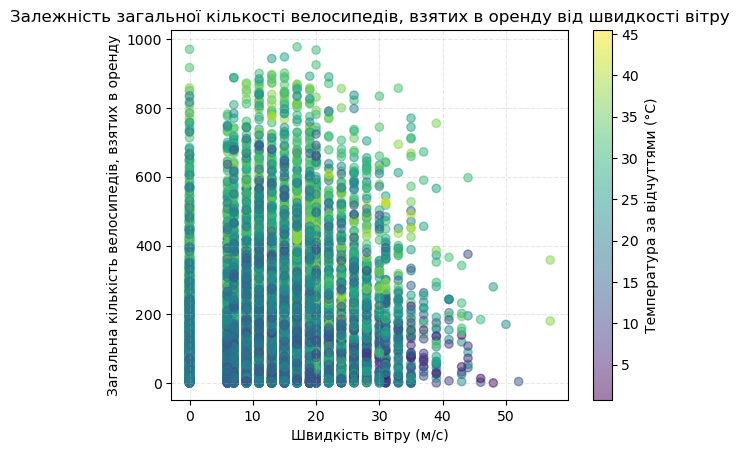

In [20]:
scatter = plt.scatter(df['windspeed'], df['count'], c=df['atemp'], cmap='viridis', alpha=.5)
plt.title('Залежність загальної кількості велосипедів, взятих в оренду від швидкості вітру')
plt.xlabel('Швидкість вітру (м/с)')
plt.ylabel('Загальна кількість велосипедів, взятих в оренду')
plt.colorbar(label='Температура за відчуттями (°C)')
plt.grid(alpha=0.3, linestyle='--')

На основі отриманого графіку можна відмітити:
- Загальний тренд:
  Зі збільшенням швидкості вітру кількість оренд велосипедів знижується.
Найбільша кількість оренд спостерігається при низьких швидкостях вітру (0–20 м/с).
Після 30 м/с кількість оренд значно зменшується, що логічно, оскільки високий вітер ускладнює пересування на велосипеді.
- Температурний фактор
Кольори відображають температуру за відчуттями (atemp):
При високих температурах (35–45°C) спостерігається більше оренд, навіть при середній швидкості вітру.
При низьких температурах (нижче 15°C) кількість оренд є значно меншою, навіть якщо вітер слабкий.
Це свідчить про те, що температура також є важливим фактором впливу.
- Аномальні точки
Є поодинокі точки при дуже високих швидкостях вітру (40–50 м/с), де кількість оренд все ще присутня. Це можуть бути помилки в даних або унікальні ситуації (наприклад, короткі поїздки).
- Інсайти
Сприятливі умови для оренди велосипедів: низька швидкість вітру (0–10 м/с) і помірна температура.
При розробці стратегії прокату велосипедів варто враховувати вплив вітряних днів (наприклад, надавати знижки або стимулювати прокат в укритих від вітру місцях).

3. Визначимо розподіл кількості оренди велосипедів за порами року

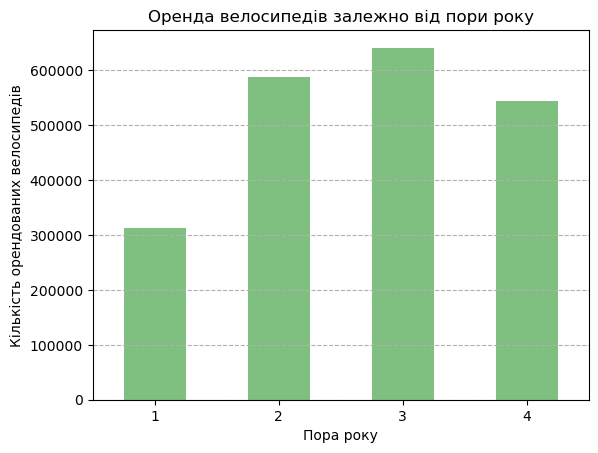

In [26]:
season_summary = df.groupby('season')['count'].sum()
season_summary.plot(kind='bar', color='green', alpha=.5)
plt.xlabel('Пора року')
plt.ylabel('Кількість орендованих велосипедів')
plt.title('Оренда велосипедів залежно від пори року')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

Згдіно опису до даних числові значення сезонів відповідають порам року:
1- весна, 2 - літо, 3 - осінь, 4 - зима.
Виходячи з отриманих даних можна зробити висновок про настуне:
1. Загальний тренд
Осінь (3-й сезон) має найвищу кількість оренд.
Літо (2-й сезон) також показує досить високі оренди, хоча й менші за осінь.
Зима (4-й сезон) має дещо нижчу кількість оренд, але ще достатньо високу.
Весна (1-й сезон) має найнижчу кількість оренд.
Спираючись на дані про погоду характерну для певної пори року в Індії, де працює компанія, ці дані  логічні. Згідно проведеного аналізу інформації про погоду найкращий час для велосипедних подорожей в Індії: зима (листопад - лютий) та осінь (жовтень - листопад), коли температура комфортна і мінімум опадів; весна може бути хорошим часом для велоподорожей у гірських районах; літо через мусонні дощі не є оптимальним періодом для велосипедних подорожей у більшості регіонів Індії.
Отже, можемо зробити висновки:
Осінь та літо є найкращими сезонами для велоподорожей в Індії, і це підтверджує високий рівень оренди велосипедів в осінньому сезоні (3-й сезон), а також у літній період.
Зима також є досить сприятливою для використання велосипедів завдяки м'якшій температурі, що підтримує досить високий рівень оренди.
Весна, ймовірно, є менш популярним періодом для оренди велосипедів через високу температуру та вологість у багатьох регіонах, що логічно призводить до низького рівня оренд у цей період.
